In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
* ## напишіть функцію гіпотези лінійної регресії у векторному вигляді
***

<!-- > ### $$h(x) = w_0 + w_1 x$$ -->
> ### $$h(x_1, \ldots, x_n) = w_0 + w_1 x_1 + \ldots + w_n x_n$$
> ### $$h(x_i) = \sum_{i=1}^{n} w_i x_i$$
> ### $$\vec{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_n \end{pmatrix}, \vec{w} = \begin{pmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{pmatrix}$$
> ### $$h(\vec{x}) = \vec{x} \cdot \vec{w}$$

In [2]:
def hypothesis(x_array: np.array, weight_array: np.array):
    return np.dot(x_array, weight_array)

***
* ## створіть функцію для обчислення функції втрат у векторному вигляді
***

 > ### $$ MSE(\vec{w}) = \frac{1}{2n} \left(\vec{y} - \vec{h}(\mathbf{X}, \vec{w}) \right)^2 $$
 > ### $$MSE(loss func) = \frac{1}{2n} \sum_{i=0}^n \left({y}_i-{y\_pred}_i\right)^2$$ 
 <!-- ##### $MSE$ - _функція середньоквадратичної помилки_ -->

In [3]:
def lossfunc(X: np.array, y: np.array, weights: np.array):

    n = y.shape[0]
    h = hypothesis(X, weights)
    
    loss_n = (1 / (2 * n)) * np.sum(np.square(y - h))

    return loss_n

***
* ## реалізуйте один крок градієнтного спуску
***

> ### $$\vec{w} = \vec{w}^{prev} - {\alpha}\nabla{MSE} \left(\vec{w} \right)$$
> ### $$\nabla MSE(\vec{w}) = \frac{1}{m} X^T (X\vec{w} - \vec{y})$$

In [4]:
def gradient_descent_step(X, y, w, learning_rate):
    m = y.shape[0]
    h = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    w -= learning_rate * gradient
    return w

***
* ## знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень
***

In [5]:
# Import data
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### _Аналіз даних:_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


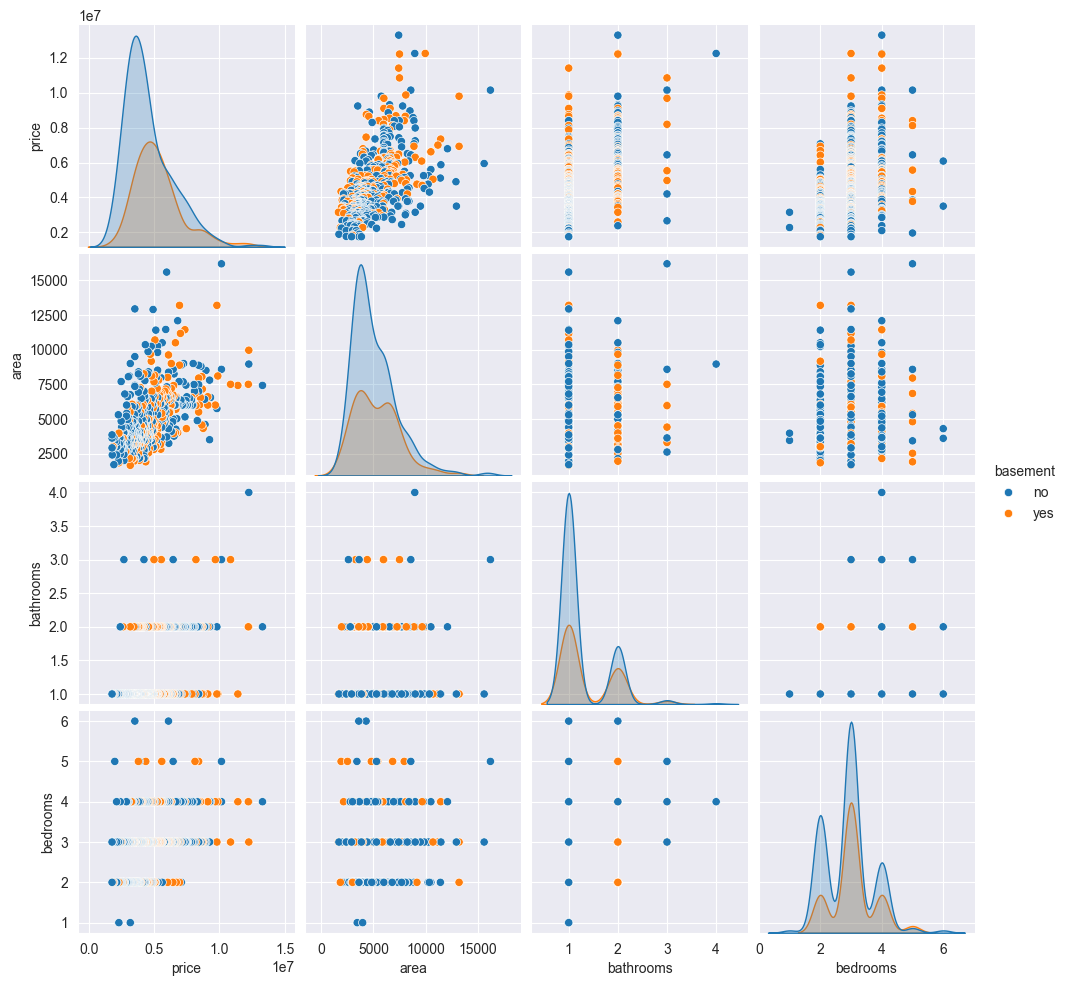

In [7]:
sns.set_style("darkgrid")
features_to_analyse = ["price", "area", "bathrooms", "bedrooms"]
sns.pairplot(df, vars=features_to_analyse, hue="basement")
plt.show()

<Axes: >

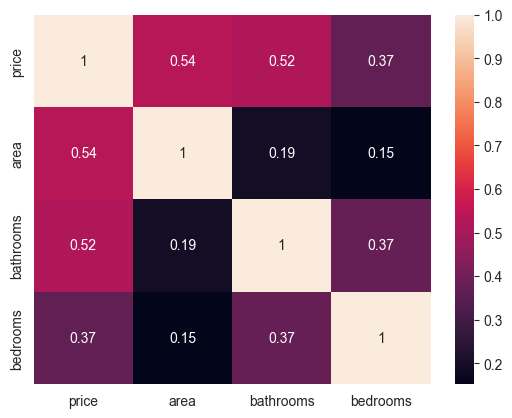

In [8]:
df_corr = df[features_to_analyse].corr()
sns.heatmap(df_corr, annot=True)

##### _Нормалізація:_

In [9]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []

    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)
    return result

In [10]:
norm = pd.DataFrame()
norm["price"] = normalization(df.price)
norm["area"] = normalization(df.area)
norm["bathrooms"] = normalization(df.bathrooms)
norm["bedrooms"] = normalization(df.bedrooms)
norm.head()

,price,area,bathrooms,bedrooms
0,0.738811,0.155977,0.237920,0.206972
1,0.647902,0.261818,0.904587,0.206972
2,0.647902,0.330547,0.237920,0.006972
3,0.644872,0.161475,0.237920,0.206972
4,0.575175,0.155977,-0.095413,0.206972


##### _Реалізація методу:_

In [11]:
def grad_descent(X, y, w, learning_rate=0.01, num_iterations=4000):
    for _ in range(num_iterations):
        weight = gradient_descent_step(X, y, w, learning_rate)
    return weight

In [12]:
X_norm = norm[["area", "bathrooms", "bedrooms"]]
y_norm = norm["price"]

# додаємо колонку ('1') до Х_norm
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]

# початкові значення для w=array([0., 0., 0., 0.])
weight_start = np.zeros(X_norm.shape[1])

w_descent = grad_descent(
    X_norm, y_norm, weight_start, learning_rate=0.1, num_iterations=10000
)
MSE_descent = lossfunc(X_norm, y_norm, w_descent)
print("MSE =", MSE_descent)
print("оптимальні значення для w (descent):\n", w_descent)

MSE = 0.0067134051085149075
оптимальні значення для w (descent):
 [4.78261671e-17 4.77142689e-01 3.60012847e-01 1.76112582e-01]


***
* ## знайдіть ці ж параметри за допомогою аналітичного рішення
***

In [13]:
w_linalg = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y_norm)

MSE_linalg = lossfunc(X_norm, y_norm, w_linalg)

print("MSE =", MSE_linalg)
print("оптимальні значення для w (linalg):\n", w_linalg)

MSE = 0.006713405108514906
оптимальні значення для w (linalg):
 [4.74427517e-17 4.77142690e-01 3.60012857e-01 1.76112569e-01]


***
* ## порівняйте отримані результати
***

In [14]:
print("градієнтний спуск: ")
print("-----------------")
print("    MSE =", MSE_descent)
print("weights =", w_descent, "\n")


print("аналітичне рішення: ")
print("------------------")
print("    MSE =", MSE_linalg)
print("weights =", w_linalg)

градієнтний спуск: 
-----------------
    MSE = 0.0067134051085149075
weights = [4.78261671e-17 4.77142689e-01 3.60012847e-01 1.76112582e-01] 

аналітичне рішення: 
------------------
    MSE = 0.006713405108514906
weights = [4.74427517e-17 4.77142690e-01 3.60012857e-01 1.76112569e-01]


<div class="alert alert-block alert-info">
<b>Висновки:</b> Результати, отримані методом градієнтного спуску та результати, отримані за допомогою аналітичного рішення (np.linalg.inv()) майже ідентичні
</div>